### Deep Reinfocement Learning - Evolution Strategies - Chapter 5

# Evolution Strategies - Code Breakdown for Test Study

This notebook implements a **Genetic Algorithm** to evolve random strings into the target "Hello World!". Here are the key components you need to memorize:

## Core Concepts:
1. **Population**: A group of candidate solutions (Individual objects)
2. **Fitness**: How close each string is to the target (0-1 similarity score)
3. **Selection**: Choose parents based on fitness (fitness-proportional selection)
4. **Crossover/Recombination**: Combine two parents to create offspring
5. **Mutation**: Random changes to introduce variety
6. **Evolution Loop**: Repeat selection → crossover → mutation for many generations

In [1]:
import random
from matplotlib import pyplot as plt

## 1. Imports and Setup
- `random`: For generating random numbers, choices, mutations
- `matplotlib.pyplot`: For plotting the fitness evolution over generations

In [2]:
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! "
target = "Hello World!"

## 2. Problem Definition
- **Alphabet**: All possible characters that can appear in our strings
- **Target**: The string we want to evolve toward ("Hello World!")
- The algorithm will try to create random strings that gradually become more similar to this target

In [3]:
class Individual:
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

## 3. Individual Class (Chromosome/Candidate Solution)
**Key concept**: Each Individual represents one candidate solution in our population
- `string`: The actual character sequence (genotype)
- `fitness`: How good this solution is (0.0 = worst, 1.0 = perfect match)

**Remember**: This is the basic building block of the population!

In [4]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

## 4. Fitness Function
**Critical for test**: This measures how "good" each solution is
- Uses `SequenceMatcher` to compare two strings
- Returns a ratio from 0.0 (completely different) to 1.0 (identical)
- Example: similar("Hello", "Hallo") might return 0.8

**Remember**: Fitness guides selection - better individuals are more likely to reproduce!

In [5]:
def spawn_population(length=26,size=100):
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop

## 5. Population Initialization
**Key GA step**: Create the initial random population
- Generates `size` number of random individuals
- Each individual has a random string of specified `length`
- Uses `random.choices(alphabet, k=length)` to pick random characters

**Test tip**: This creates genetic diversity to start the evolution process!

In [6]:
def mutate(x, mut_rate=0.01):
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

## 6. Mutation Operator
**Essential GA operator**: Introduces random changes to maintain diversity
- For each character in the string:
  - With probability `mut_rate` (e.g., 1%), replace with random character
  - Otherwise, keep the original character
- **Purpose**: Prevents getting stuck in local optima
- **Balance**: Too high = chaos, too low = stagnation

**Test key**: Mutation rate is usually small (0.001 to 0.1)

In [7]:
def recombine(p1_, p2_): #produces two children from two parents
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

## 7. Crossover/Recombination (Most Important!)
**Core GA operator**: Combines two parents to create offspring
- **Single-point crossover**: Pick random crossover point
- **Child1**: Parent1[0:cross_pt] + Parent2[cross_pt:end]
- **Child2**: Parent2[0:cross_pt] + Parent1[cross_pt:end]

**Example**: 
- Parent1: "Hello" Parent2: "World" Cross_pt: 3
- Child1: "Hel" + "ld" = "Helld" 
- Child2: "Wor" + "lo" = "Worlo"

**Test crucial**: This mixes good traits from both parents!

In [8]:
def evaluate_population(pop, target):
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

## 8. Population Evaluation
**Key step**: Calculate fitness for every individual in the population
- Loops through each individual
- Calls `similar()` to compare with target
- Updates each individual's fitness value
- Returns population and average fitness

**Remember**: This step is needed before selection can happen!

In [9]:
def next_generation(pop, size=100, length=26, mut_rate=0.01):
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        offspring = [mutate(offspring_[0], mut_rate=mut_rate), mutate(offspring_[1], mut_rate=mut_rate)]
        new_pop.extend(offspring) #add offspring to next generation
    return new_pop

## 9. Next Generation Creation (The Heart of GA!)
**Complete reproduction cycle**:
1. **Selection**: `random.choices()` with fitness weights (fitness-proportional selection)
2. **Crossover**: `recombine()` two parents → two offspring  
3. **Mutation**: `mutate()` both offspring
4. **Repeat** until new population is full

**Test critical**: Higher fitness = higher chance of being selected as parent!
- `weights=[x.fitness for x in pop]` makes fitter individuals more likely to reproduce

In [10]:
pop = spawn_population(length=len(target))

In [11]:
pop, avg_fit = evaluate_population(pop, target)
print(avg_fit)

0.10583333333333338


In [12]:
new_pop = next_generation(pop, length=len(target))

In [13]:
new_pop[10].fitness

0

In [14]:
num_generations = 100
population_size = 3000
str_len = len(target)
mutation_rate = 0.001 # 0.1% mutation rate per character

In [15]:
pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #initial population
for gen in range(num_generations):
    # trainning
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #record population average fitness
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop

## 10. Main Evolution Loop
**The complete GA algorithm**:
```
FOR each generation:
    1. Evaluate population fitness
    2. Record average fitness (for plotting)
    3. Create next generation (selection + crossover + mutation)
    4. Replace old population
```

**Parameters to memorize**:
- 100 generations
- 3000 population size  
- 0.001 mutation rate (0.1% per character)

**Result**: Population evolves toward the target string over time!

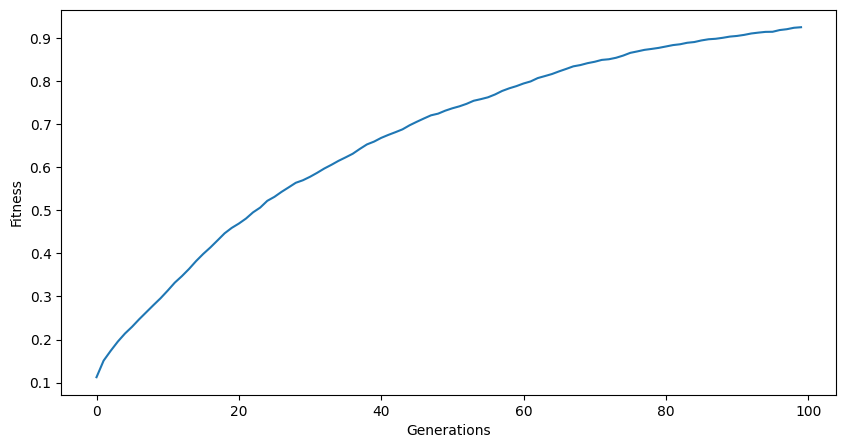

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.plot(pop_fit)

In [17]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first

In [18]:
pop[0].string

'Hello World!'

## Key Points for Your Test:

### GA Algorithm Steps (memorize this order!):
1. **Initialize** random population
2. **Evaluate** fitness of all individuals  
3. **Select** parents (fitness-proportional)
4. **Crossover** parents to create offspring
5. **Mutate** offspring 
6. **Replace** old population with new generation
7. **Repeat** steps 2-6 until convergence

### Critical Concepts:
- **Fitness Function**: Measures solution quality (0.0 to 1.0)
- **Selection Pressure**: Better fitness = more likely to reproduce
- **Crossover**: Combines good traits from two parents
- **Mutation**: Maintains diversity, prevents local optima
- **Population Size**: Larger = more diversity but slower
- **Mutation Rate**: Usually 0.1% to 5% per gene

### This Example:
- **Problem**: Evolve strings to match "Hello World!"
- **Representation**: String of characters
- **Fitness**: String similarity (SequenceMatcher ratio)
- **Selection**: Fitness-proportional (weighted random)
- **Crossover**: Single-point crossover
- **Mutation**: Random character replacement